<a href="https://colab.research.google.com/github/bhargav-borah/PolyRegModel/blob/main/polynomial_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Linear Regression (with implementaion of PolynomialFeatures from scratch)

## Importing the libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Defining the LinearRegressor class

In [159]:
class LinearRegressor:

  def __init__(self, learning_rate = 0.001, epochs = 1000):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    for _ in range(self.epochs):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (2 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (2 / n_samples) * np.sum(y_pred - y)

      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db
      print(self.weights)

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

  def mse(self, y_test, y_pred):
    return np.mean((y_test - y_pred) ** 2)

  def r2_score(self, y_test, y_pred):
    val = np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
    return 1 - val


## Define Polynomial Features class

In [160]:
class PolynomialFeatures:

  def __init__(self, degree = 2):
    self.degree = degree

  def fit_transform(self, X):
    X_poly = np.concatenate([X ** i for i in range(1, self.degree + 1)], axis = 1)
    X_poly = np.concatenate([np.ones((X_poly.shape[0], 1)), X_poly], axis = 1)

    return X_poly

## Importing the data set

In [161]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, -1].values

X = X.reshape(-1, 1)

In [162]:
X.shape

(10, 1)

## Training the model on the Training set

In [163]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # not using LinearRegressor class due to overflow error because of weights
reg.fit(X_poly, y)

LinearRegression()

In [164]:
y_pred = reg.predict(X_poly)

In [165]:
print(np.concatenate((y.reshape(-1, 1), y_pred.reshape(-1, 1)), axis = 1))

[[  45000.           53356.64335675]
 [  50000.           31759.90675984]
 [  60000.           58642.1911421 ]
 [  80000.           94632.86713282]
 [ 110000.          121724.94172495]
 [ 150000.          143275.05827509]
 [ 200000.          184003.49650352]
 [ 300000.          289994.17249417]
 [ 500000.          528694.63869462]
 [1000000.          988916.08391612]]


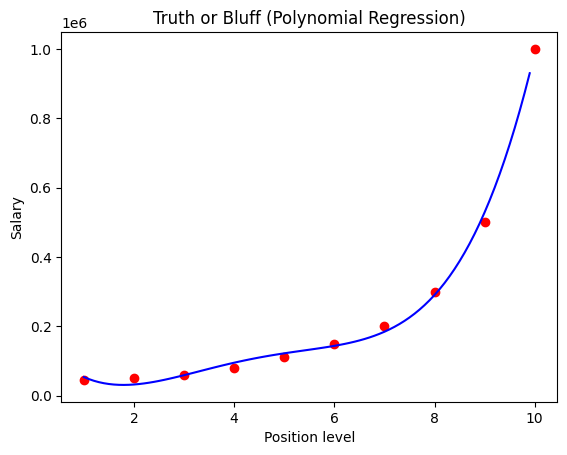

In [166]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(-1, 1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()